# Market Segmentation McDonalds Case Study - Project 2

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis

In [2]:
df = pd.read_csv(r"D:\Feynn\Project 2\McDonalds Case Study-20250224T164736Z-001\McDonalds Case Study\mcdonalds.csv")

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.shape

(1453, 15)

In [5]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [6]:
import warnings
warnings.filterwarnings('ignore')

### preprocessing the colum values, converting str into int

In [7]:
df['Like'].replace(to_replace=["I love it!+5","I hate it!-5"],value=["+5","-5"],inplace=True);

In [8]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [9]:
df['Like'] = df['Like'].astype(int)

In [10]:
df['Like']

0      -3
1       2
2       1
3       4
4       2
       ..
1448   -5
1449    2
1450    3
1451    4
1452   -3
Name: Like, Length: 1453, dtype: int32

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   int32 
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int32(1), int64(1), object(13)
memory usage: 164.7+ KB


In [12]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

### Data Preparation

In [13]:
encoded_df = pd.get_dummies(df,drop_first=True).astype(int)

In [14]:
encoded_df

,Like,Age,yummy_Yes,convenient_Yes,spicy_Yes,fattening_Yes,greasy_Yes,fast_Yes,cheap_Yes,tasty_Yes,expensive_Yes,healthy_Yes,disgusting_Yes,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year,Gender_Male
0,-3,61,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0
1,2,51,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0
2,1,62,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0
3,4,69,1,1,0,1,1,1,1,1,0,0,1,0,0,0,1,0,0
4,2,49,0,1,0,1,1,1,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,-5,47,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1
1449,2,36,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0
1450,3,52,1,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0
1451,4,41,1,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1


<Axes: >

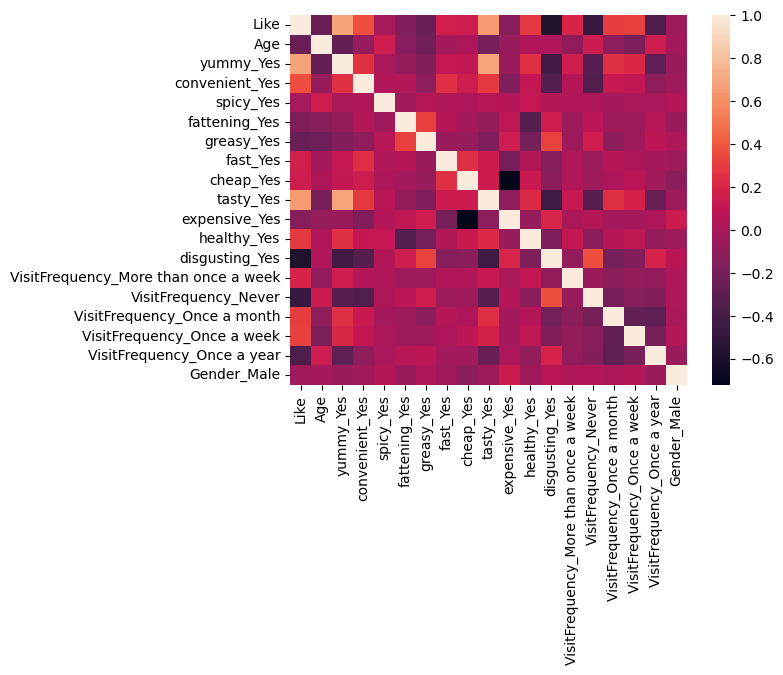

In [15]:
sns.heatmap(encoded_df.corr())

In [16]:
encoded_df.columns

Index(['Like', 'Age', 'yummy_Yes', 'convenient_Yes', 'spicy_Yes',
       'fattening_Yes', 'greasy_Yes', 'fast_Yes', 'cheap_Yes', 'tasty_Yes',
       'expensive_Yes', 'healthy_Yes', 'disgusting_Yes',
       'VisitFrequency_More than once a week', 'VisitFrequency_Never',
       'VisitFrequency_Once a month', 'VisitFrequency_Once a week',
       'VisitFrequency_Once a year', 'Gender_Male'],
      dtype='object')

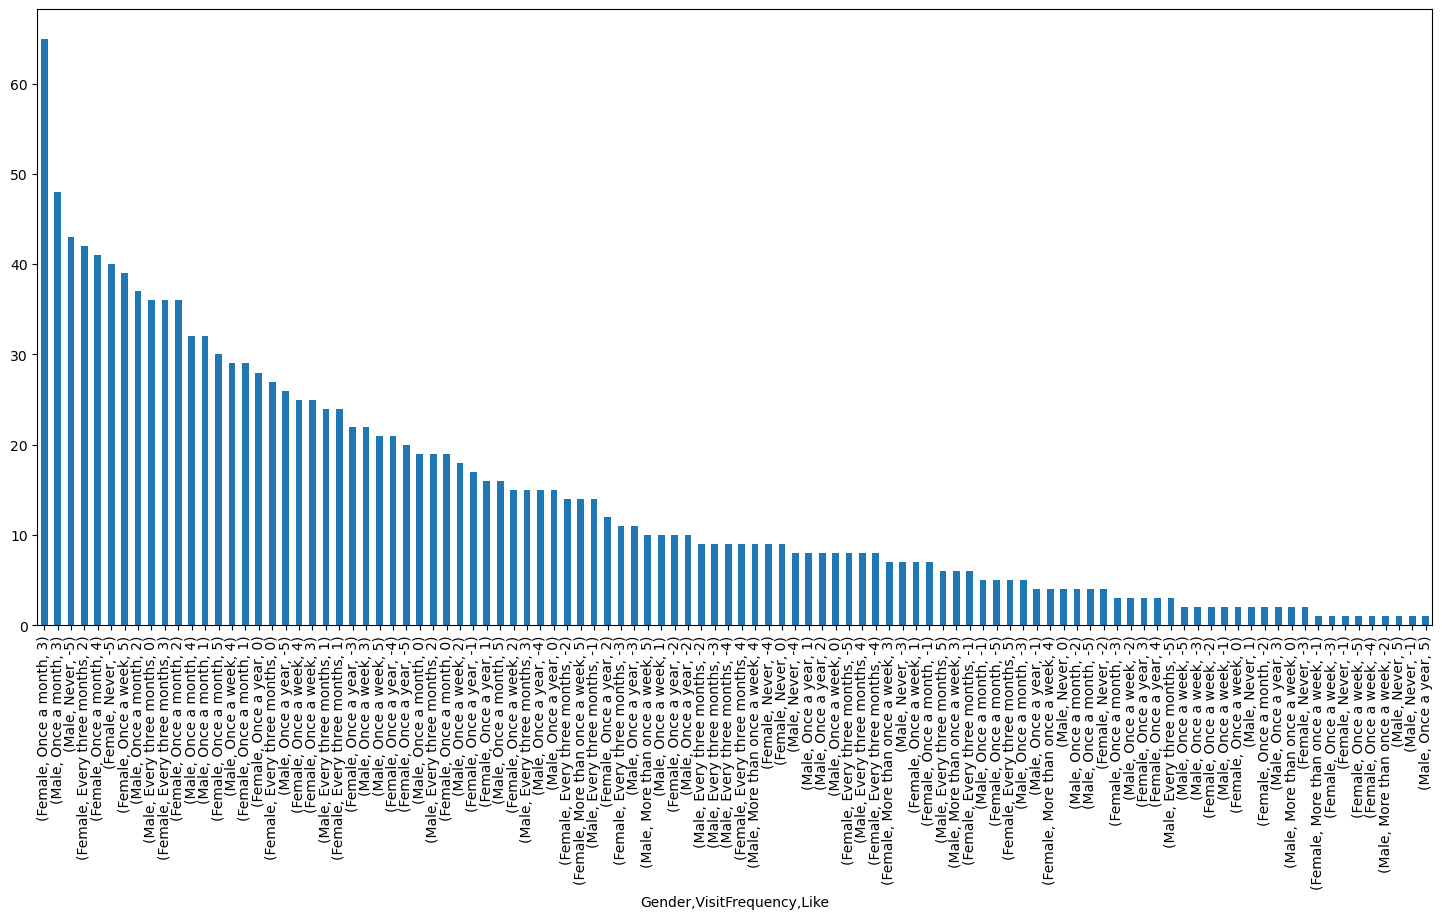

In [17]:
plt.figure(figsize=(18,8))
df[['Gender','VisitFrequency','Like']].sort_values('Like',ascending=True).value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.show();

<Axes: xlabel='Age', ylabel='Count'>

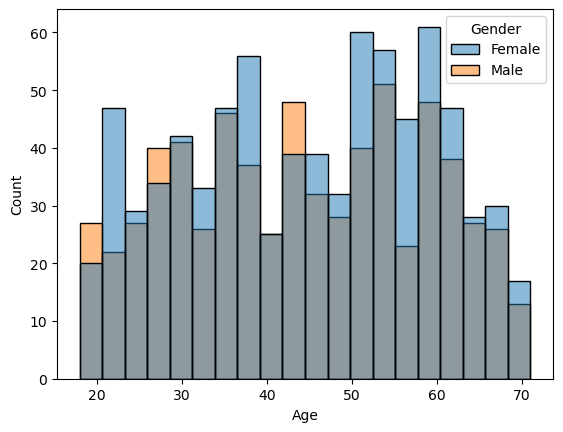

In [18]:
sns.histplot(data=df,x='Age',bins=20,hue='Gender')

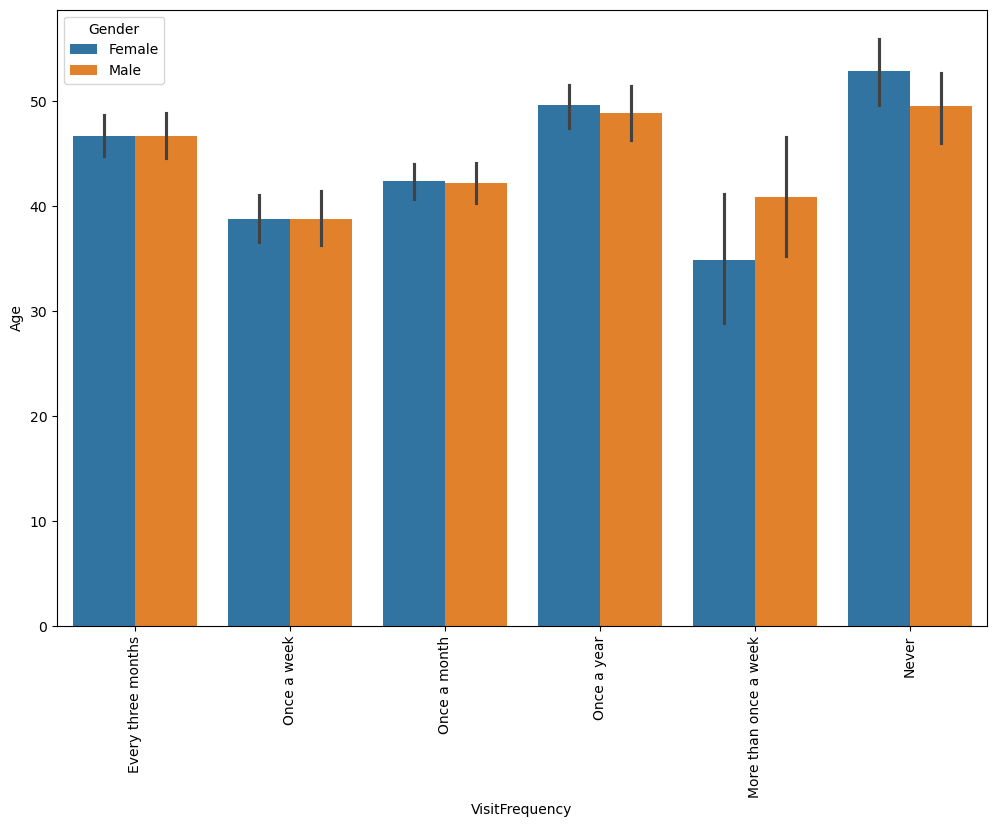

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,y='Age',hue="Gender",x='VisitFrequency')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Gender', ylabel='Age'>

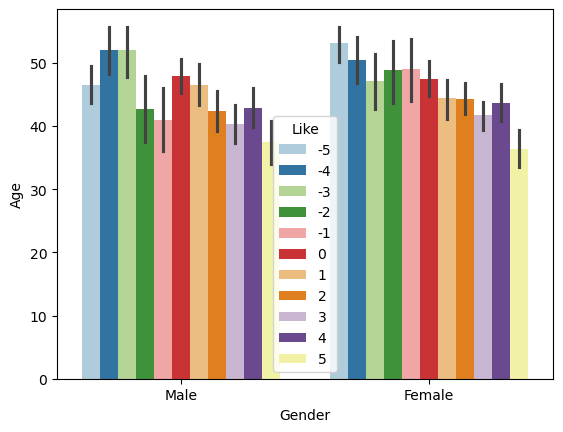

In [20]:
sns.barplot(hue='Like',y='Age',x='Gender',data=df.sort_values('Like',ascending=True),palette='Paired')

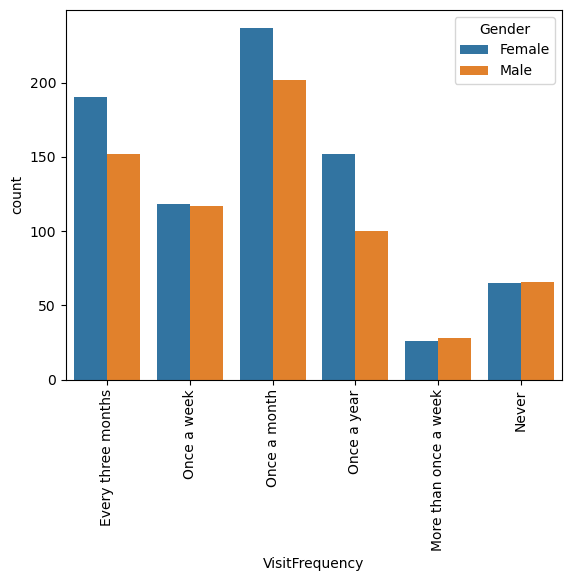

In [21]:
sns.countplot(x='VisitFrequency',data=df,hue='Gender')
plt.xticks(rotation=90);

In [22]:
df[['Gender','Age', 'Like']].value_counts()

Gender  Age  Like
Female  38   3       6
        24   3       6
        25   5       6
        34   0       6
Male    59   0       6
                    ..
Female  67   2       1
        66   5       1
             4       1
             1       1
Male    71   4       1
Name: count, Length: 758, dtype: int64

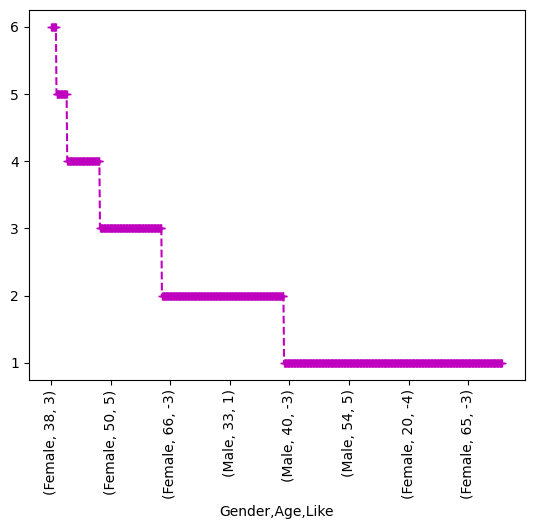

In [23]:
df[['Gender','Age', 'Like']].value_counts().plot(marker='+',ls='--',color='m')
plt.xticks(rotation=90)
plt.show();

### Data preprocessing

In [24]:
X = pd.get_dummies(df)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
X = scaler.fit_transform(X)

In [28]:
X

array([[-1.21222481,  1.15325815,  1.11147857, ..., -0.45806675,
         0.918645  , -0.918645  ],
       [ 0.39251521,  0.44983942, -0.89970246, ..., -0.45806675,
         0.918645  , -0.918645  ],
       [ 0.07156721,  1.22360002,  1.11147857, ..., -0.45806675,
         0.918645  , -0.918645  ],
       ...,
       [ 0.71346322,  0.5201813 , -0.89970246, ..., -0.45806675,
         0.918645  , -0.918645  ],
       [ 1.03441123, -0.2535793 , -0.89970246, ..., -0.45806675,
        -1.08855979,  1.08855979],
       [-1.21222481, -1.0273399 ,  1.11147857, ..., -0.45806675,
        -1.08855979,  1.08855979]])

### KMeans Clustering

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)

In [34]:
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [35]:
clusters = kmeans.predict(X)

In [36]:
clusters

array([0, 1, 1, ..., 1, 1, 0])

In [38]:
df['Clusters'] = clusters

<Axes: >

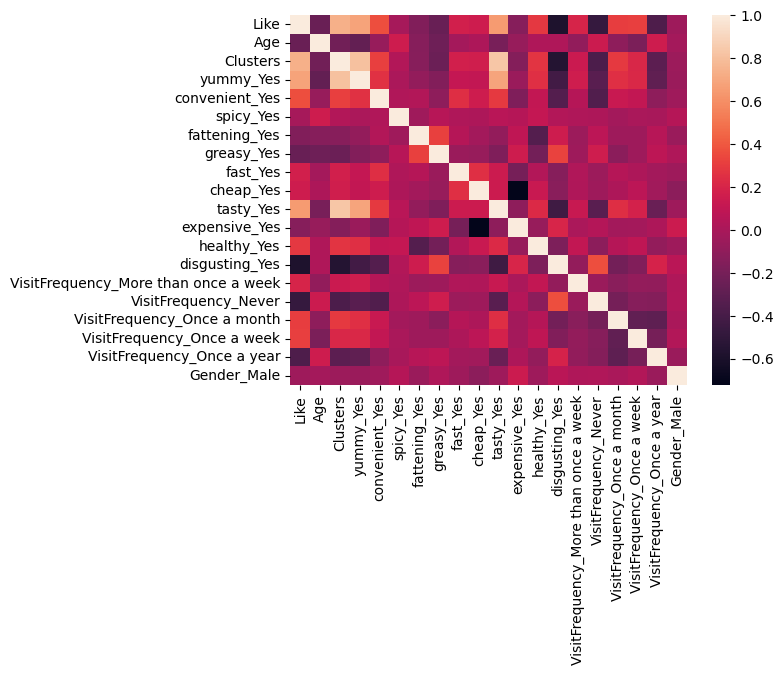

In [42]:
sns.heatmap(pd.get_dummies(df,drop_first=True).corr())

## Choosing K Value

In [43]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


X = pd.get_dummies(df) 

scores = []
K_range = range(2, 10)  # Test different K values

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)  # Calculate correct Silhouette Score
    scores.append(score)


In [44]:
scores

[0.5676610999112602,
 0.45236297711423523,
 0.39639704340378207,
 0.34565023109578247,
 0.3286012199141942,
 0.29713564434180634,
 0.31156970239619447,
 0.2891019865431927]

Text(0, 0.5, ' Sum of Squared Distances')

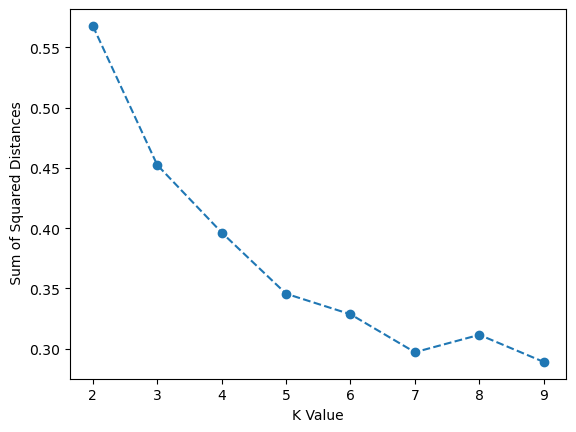

In [45]:
plt.plot(range(2,10),scores,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [46]:
pd.Series(scores).diff()

0         NaN
1   -0.115298
2   -0.055966
3   -0.050747
4   -0.017049
5   -0.031466
6    0.014434
7   -0.022468
dtype: float64

In [47]:
optimal_k = 6 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(pd.get_dummies(df))




In [48]:
df[['Age', 'VisitFrequency','Like', 'Cluster']].value_counts()

Age  VisitFrequency  Like  Cluster
50   Never           -5    2          7
60   Never           -5    1          5
25   Once a week      5    0          5
62   Once a year     -3    1          5
41   Once a month     3    3          5
                                     ..
                      1    2          1
                      2    3          1
                      5    3          1
     Once a week      1    2          1
71   Once a month     4    5          1
Name: count, Length: 948, dtype: int64

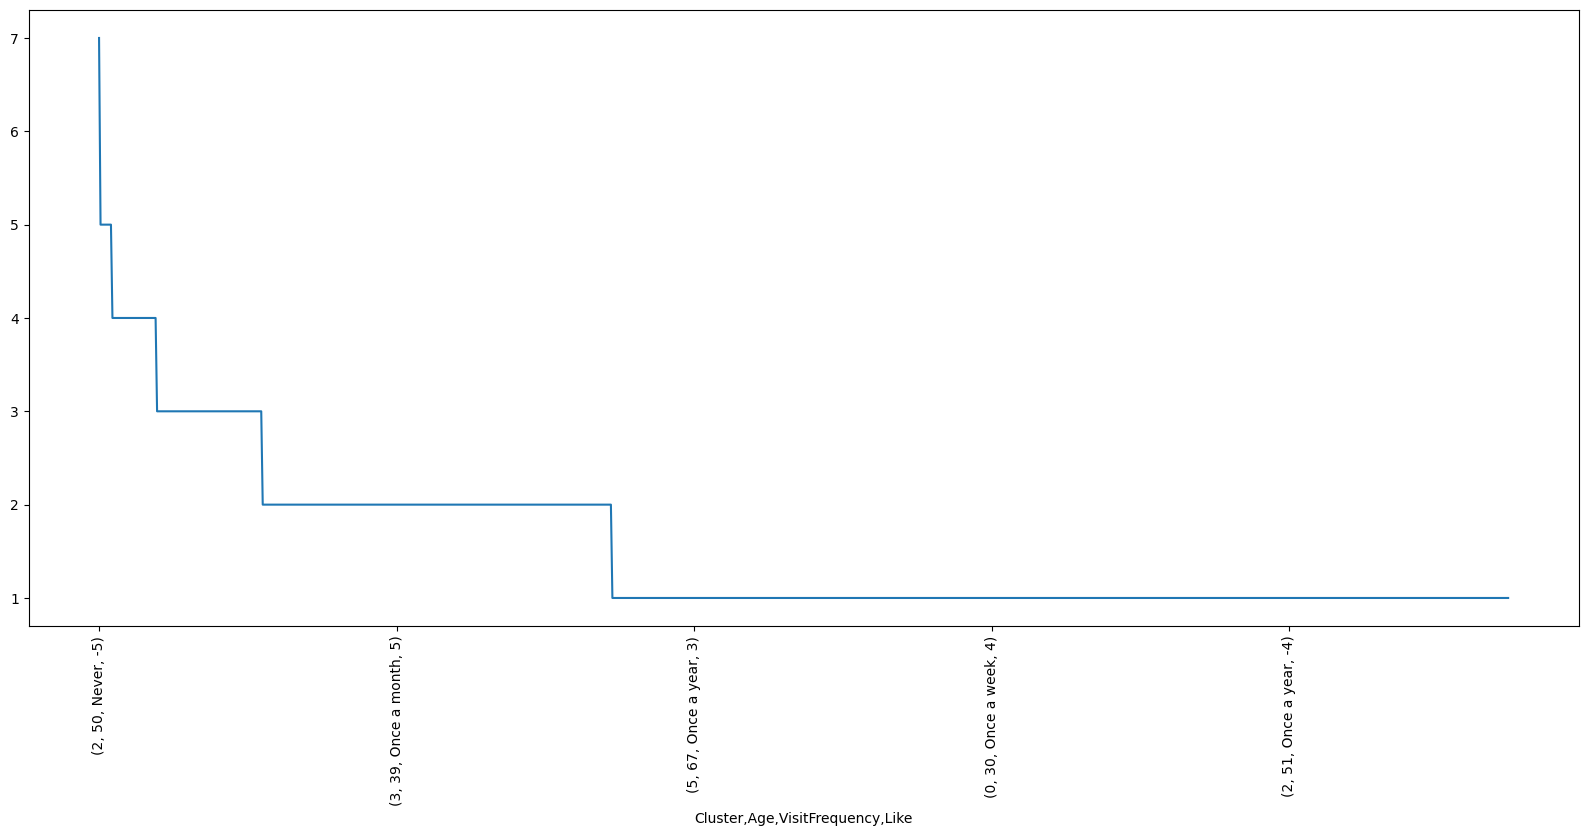

In [49]:
plt.figure(figsize=(20,8))
df[['Cluster','Age', 'VisitFrequency','Like']].value_counts().plot()
plt.xticks(rotation=90)
plt.show();

In [50]:
df['Cluster'].value_counts()

Cluster
3    323
0    297
4    262
2    256
5    163
1    152
Name: count, dtype: int64

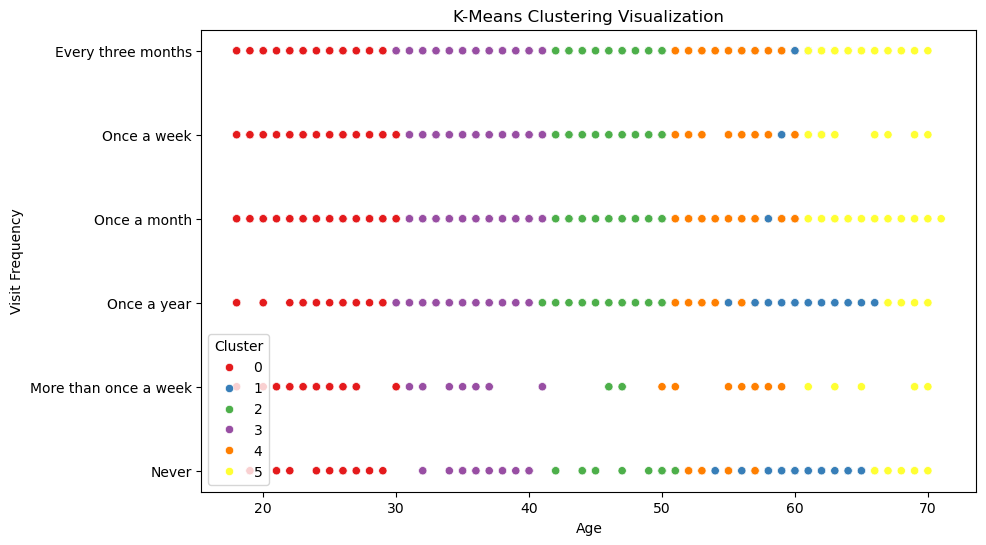

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['VisitFrequency'], hue=df['Cluster'], palette='Set1')
plt.xlabel('Age')
plt.ylabel('Visit Frequency')
plt.title('K-Means Clustering Visualization')
plt.legend(title='Cluster')
plt.show()


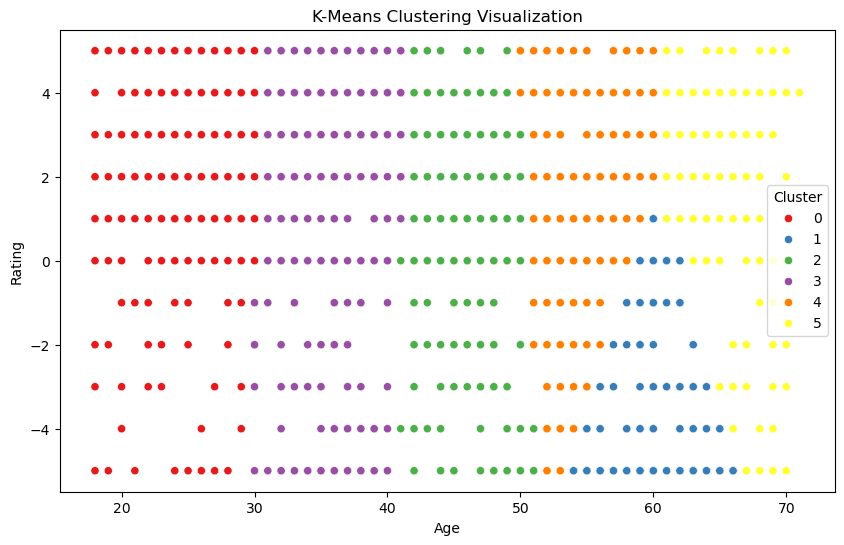

In [84]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Like'], hue=df['Cluster'], palette='Set1')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.title('K-Means Clustering Visualization')
plt.legend(title='Cluster')
plt.show()


In [52]:
clustered=pd.get_dummies(df)

In [53]:
clustered.groupby('Cluster').mean().sort_values(by="Age",ascending=False)

,Like,Age,Clusters,yummy_No,yummy_Yes,convenient_No,convenient_Yes,spicy_No,spicy_Yes,fattening_No,...,disgusting_No,disgusting_Yes,VisitFrequency_Every three months,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year,Gender_Female,Gender_Male
Cluster,,,,,,,,,,,,,,,,,,,,,
5,1.214724,65.558282,0.699387,0.447853,0.552147,0.073620,0.926380,0.822086,0.177914,0.276074,...,0.914110,0.085890,0.300613,0.036810,0.079755,0.300613,0.098160,0.184049,0.533742,0.466258
1,-3.190789,60.217105,0.118421,0.901316,0.098684,0.243421,0.756579,0.855263,0.144737,0.046053,...,0.440789,0.559211,0.203947,0.000000,0.335526,0.039474,0.026316,0.394737,0.578947,0.421053
4,1.347328,54.721374,0.664122,0.454198,0.545802,0.041985,0.958015,0.889313,0.110687,0.209924,...,0.854962,0.145038,0.309160,0.030534,0.057252,0.312977,0.114504,0.175573,0.580153,0.419847
2,0.140625,46.093750,0.507812,0.582031,0.417969,0.113281,0.886719,0.906250,0.093750,0.117188,...,0.699219,0.300781,0.234375,0.023438,0.074219,0.304688,0.183594,0.179688,0.507812,0.492188
3,1.145511,35.752322,0.712074,0.337461,0.662539,0.086687,0.913313,0.953560,0.046440,0.114551,...,0.746130,0.253870,0.198142,0.030960,0.055728,0.383901,0.188854,0.142415,0.535604,0.464396
0,2.212121,24.535354,0.814815,0.212121,0.787879,0.057239,0.942761,0.942761,0.057239,0.063973,...,0.808081,0.191919,0.191919,0.080808,0.050505,0.336700,0.259259,0.080808,0.531987,0.468013


In [54]:
clustered.describe()

,Like,Age,Clusters,Cluster
count,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.777013,44.604955,0.624914,2.406056
std,3.116842,14.221178,0.484312,1.646941
min,-5.000000,18.000000,0.000000,0.000000
25%,-1.000000,33.000000,0.000000,1.000000
50%,1.000000,45.000000,1.000000,3.000000
75%,3.000000,57.000000,1.000000,4.000000
max,5.000000,71.000000,1.000000,5.000000
